In [1]:
import os
import numpy as np
import sys
sys.path.append('../../')
from utils.VisualisationUtils import *
import matplotlib.pyplot as plt
from ultralytics import YOLO
import cv2

In [3]:
# model_path = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\instance_segmentation\yolov-seg\privacy-segmentation\yolov8s-finetune-balanced\weights\best.pt'
# model_path = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\instance_segmentation\yolov-seg\privacy-segmentation\yolov8n-adam-flip-640-3e4-mosaic-b16-2\weights\best.pt'
# model_path = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\instance_segmentation\yolov-seg\privacy-segmentation\yolov8n-640-3e4-mosaic-b16-ndata\weights\best.pt'
model_path = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\instance_segmentation\yolo-seg\privacy-segmentation\yolo11n-640-3e4-mosaic-b16-ndata\weights\best.pt'

model = YOLO(model_path)


0: 640x512 2 screens, 13.9ms
Speed: 2.7ms preprocess, 13.9ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 512)

0: 640x512 2 screens, 17.9ms
Speed: 2.2ms preprocess, 17.9ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 512)

0: 640x512 2 screens, 14.6ms
Speed: 2.5ms preprocess, 14.6ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 512)

0: 512x640 1 screen, 25.0ms
Speed: 2.5ms preprocess, 25.0ms inference, 4.9ms postprocess per image at shape (1, 3, 512, 640)

0: 640x512 1 id_card, 15.3ms
Speed: 2.7ms preprocess, 15.3ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 512)

0: 640x512 1 id_card, 15.0ms
Speed: 2.6ms preprocess, 15.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 512)

0: 640x512 1 id_card, 14.6ms
Speed: 2.7ms preprocess, 14.6ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 512)

0: 640x512 1 id_card, 15.7ms
Speed: 2.5ms preprocess, 15.7ms inference, 2.3ms postprocess per image at shape (1

<Figure size 3500x3500 with 0 Axes>

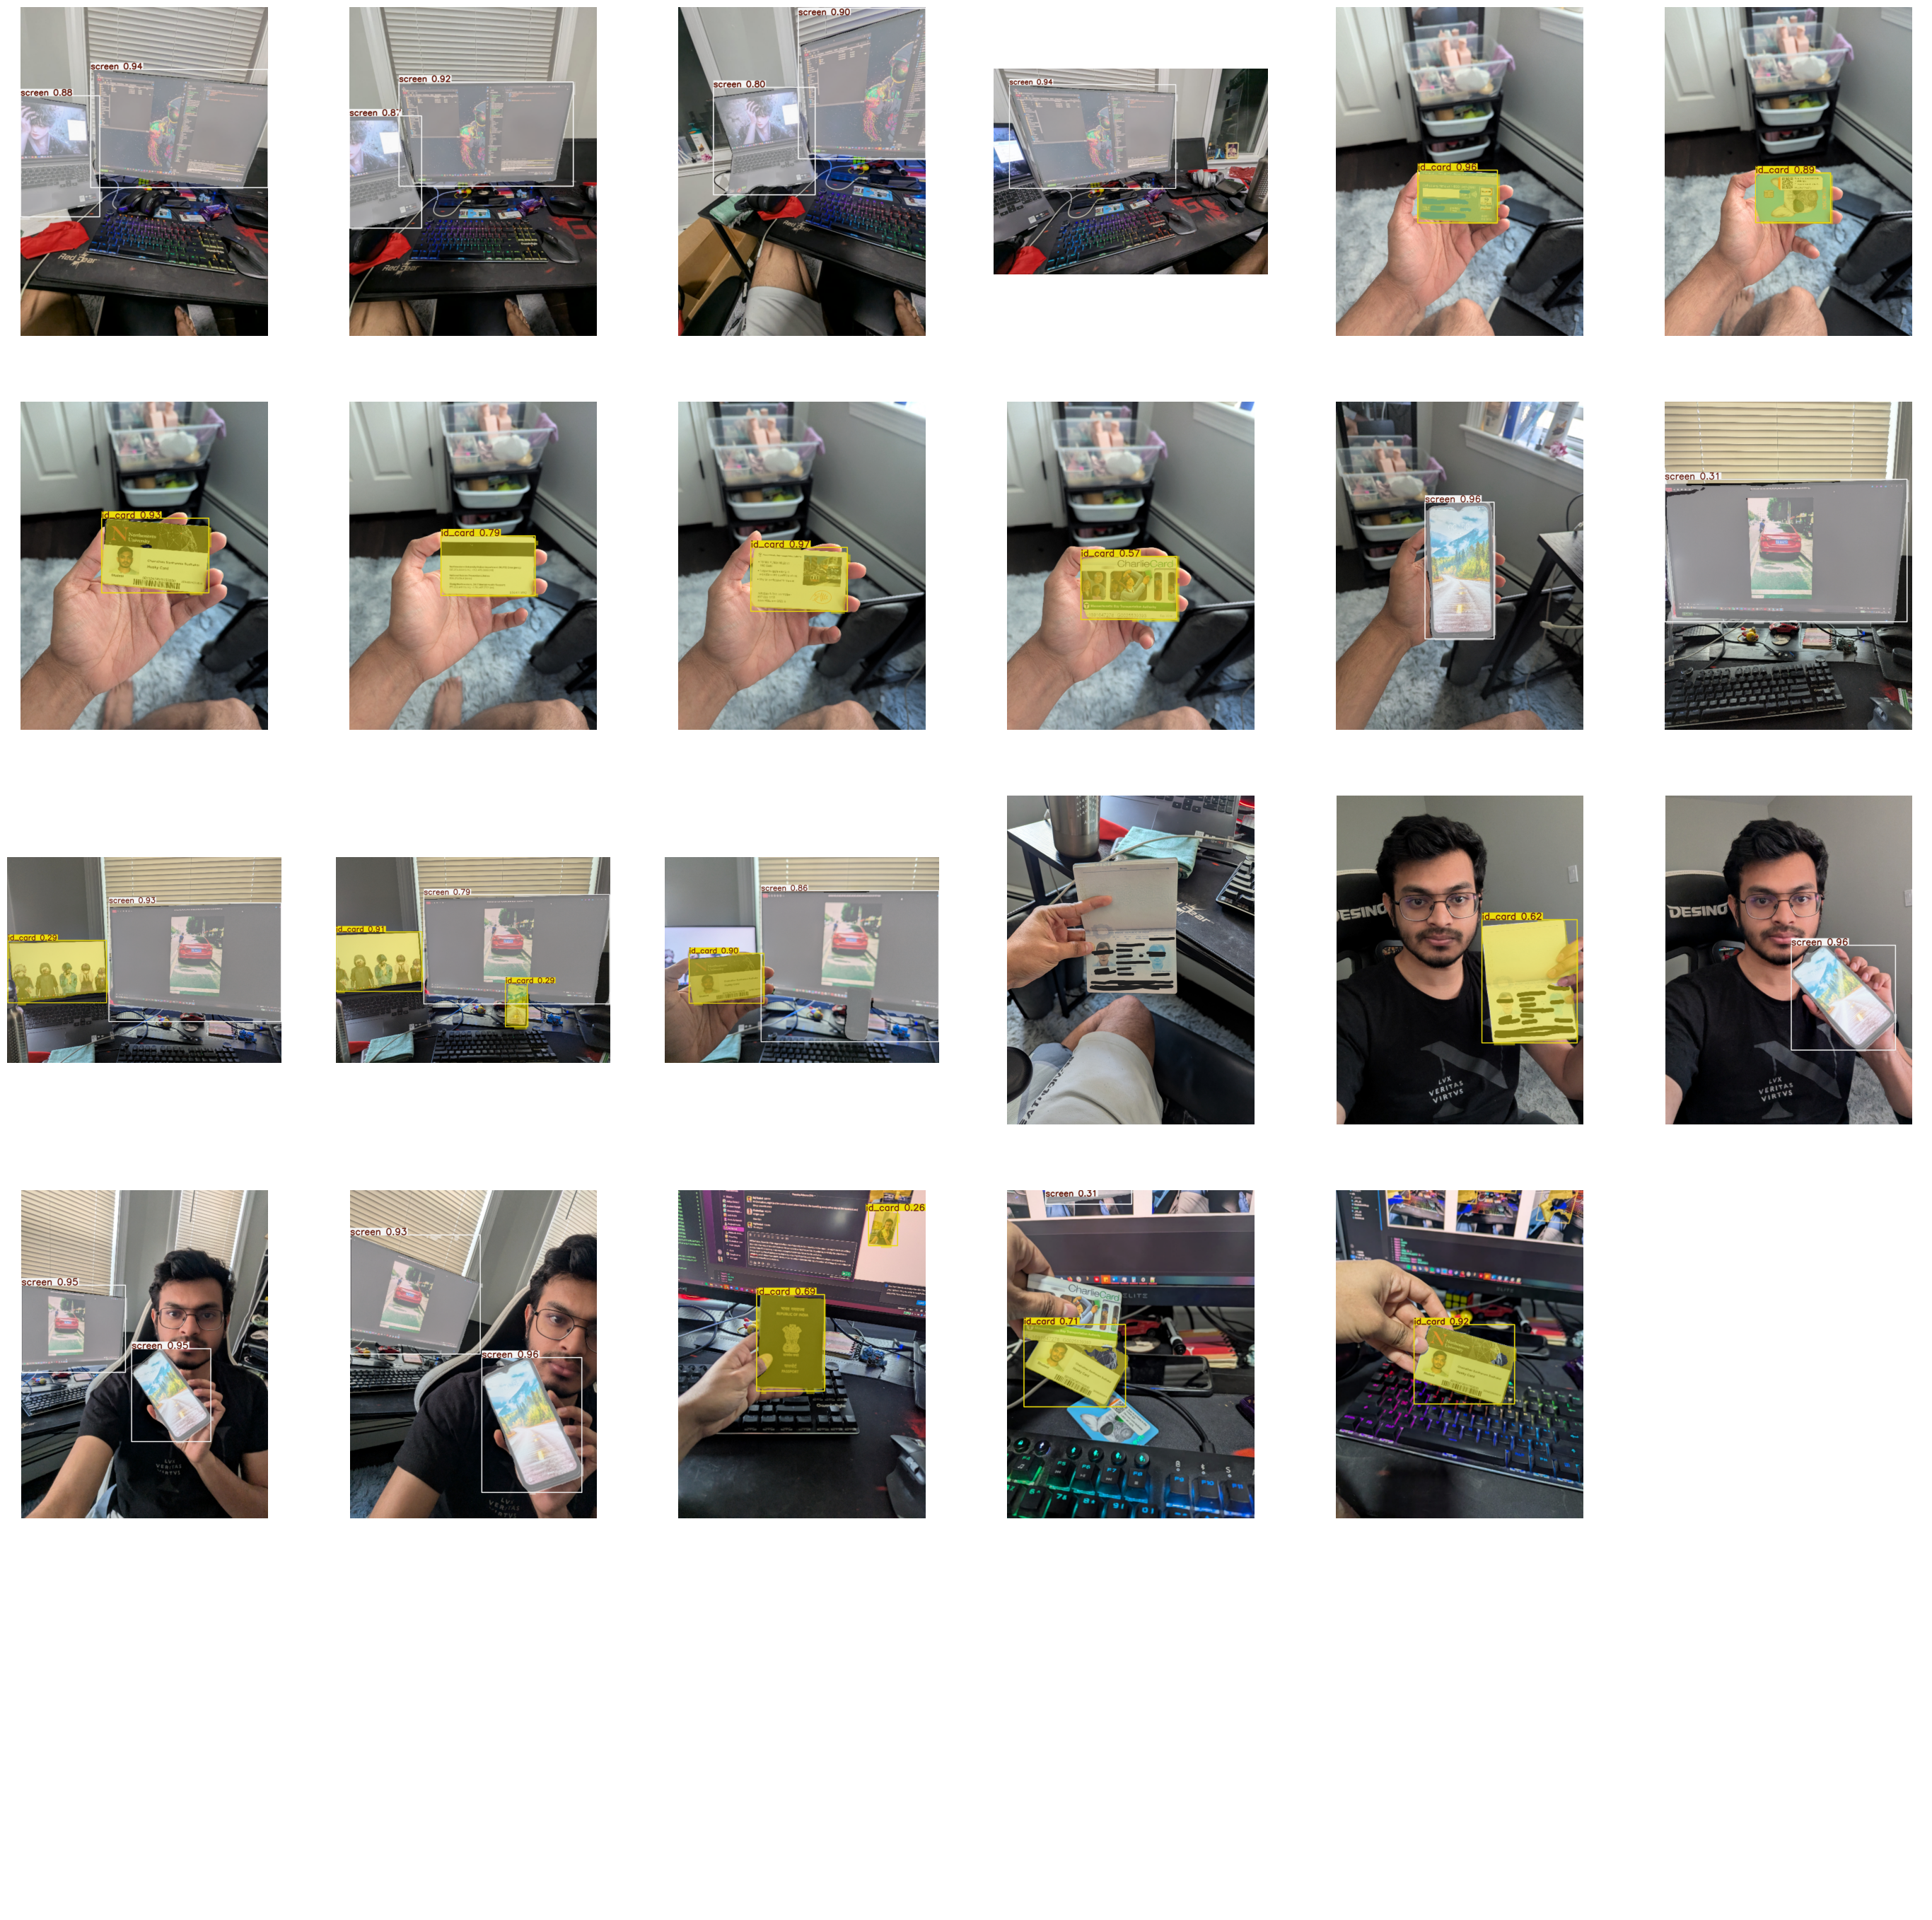

In [5]:
samples_dir = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\instance_segmentation\test_samples'
img_files = os.listdir(samples_dir)
img_files = [os.path.join(samples_dir, img) for img in img_files]

preds = []
imgs = []
for img in img_files:
    im = cv2.imread(img)
    im = cv2.cvtColor(im, cv2.COLOR_RGB2BGR)
    imgs.append(im)

    result_array = model(im)[0].plot();
    preds.append(result_array)
    # break
show_images(preds, shape=(5, 6), figsize=(35, 35))
# show_images(imgs, figsize=(25, 15))

In [10]:
result = model(im)


0: 640x512 2 screens, 93.8ms
Speed: 3.6ms preprocess, 93.8ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 512)


In [11]:
result[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'license_plate', 1: 'screen', 2: 'id_card'}
obb: None
orig_img: array([[[175, 175, 167],
        [176, 176, 168],
        [177, 177, 169],
        ...,
        [132, 127, 123],
        [132, 127, 123],
        [132, 127, 123]],

       [[175, 175, 167],
        [176, 176, 168],
        [177, 177, 169],
        ...,
        [132, 127, 123],
        [132, 127, 123],
        [132, 127, 123]],

       [[175, 175, 167],
        [176, 176, 168],
        [177, 177, 169],
        ...,
        [132, 127, 123],
        [132, 127, 123],
        [132, 127, 123]],

       ...,

       [[ 86,  65,  38],
        [ 85,  64,  37],
        [ 84,  63,  36],
        ...,
        [  0,   2,   0],
        [  0,   2,   0],
        [  0,   2,   0]],

       [[ 85,  64,  37],
        [ 84,  63,  36],
        [ 83,  62,  35],
       

In [ ]:
# Test on datasetsb

import os
import random
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
import wandb
from ultralytics import YOLO
from collections import defaultdict

# === CONFIG ===
val_images_dir = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\datasets\classes'  # CHANGE THIS
val_ann_path = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\datasets\classes\coco_bal_val.json'  # COCO format
model_path = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\instance_segmentation\yolov8-seg\privacy-segmentation\yolov8s-finetune-balanced\weights\best.pt'
num_samples_per_class = 5

# === Load COCO Annotations ===
with open(val_ann_path, 'r') as f:
    coco = json.load(f)

# Map image_id → file_name
img_id_to_file = {img["id"]: img["file_name"] for img in coco["images"]}

# Map category_id → name
category_id_to_name = {cat["id"]: cat["name"] for cat in coco["categories"]}

# Group image_ids by category
category_to_images = defaultdict(set)
for ann in coco["annotations"]:
    category_to_images[ann["category_id"]].add(ann["image_id"])

# Pick N images per class
selected_images = set()
for cat_id, image_ids in category_to_images.items():
    selected = random.sample(list(image_ids), min(num_samples_per_class, len(image_ids)))
    selected_images.update(selected)

# === Load Model ===
model = YOLO(model_path)



image 1/1 C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\datasets\classes\midv500_data\images\28_hun_passport\images\HA\HA28_23.jpg: 640x384 1 id_card, 9566.0ms
Speed: 5.3ms preprocess, 9566.0ms inference, 238.2ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\datasets\classes\Screen\images_balanced\20190928_034355_000_jpg.rf.42187c8c139751320bccb6fd32015d72_dup2.jpg: 640x640 1 screen, 20371.5ms
Speed: 8.8ms preprocess, 20371.5ms inference, 14.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\datasets\classes\CCPD2019\images\00873204022988-90_98-295&509_466&574-444&571_286&576_311&513_469&508-0_0_8_32_32_31_11-77-27.jpg: 640x416 1 license_plate, 7083.7ms
Speed: 6.4ms preprocess, 7083.7ms inference, 12.7ms postprocess per image at shape (1, 3, 640, 416)

image 1/1 C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\dat

<Figure size 2500x1500 with 0 Axes>

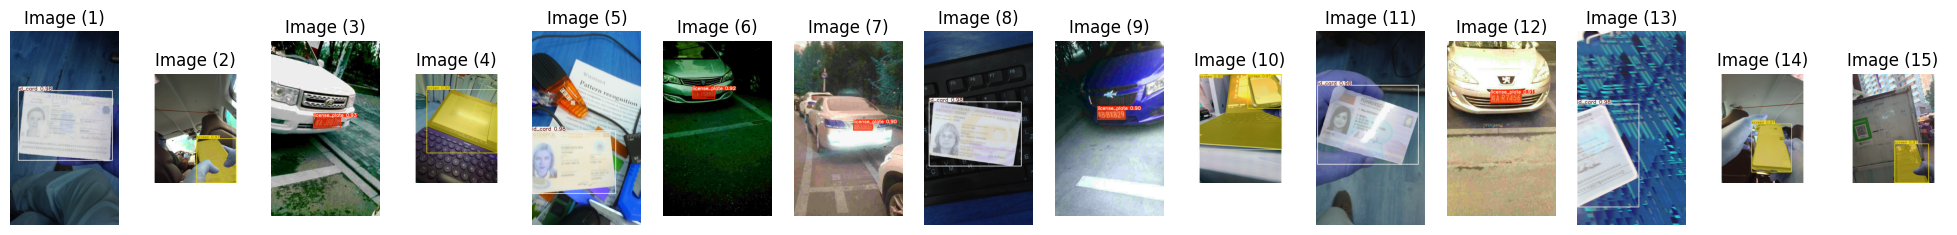

In [ ]:
results = []
# Iterate over validation dataset
for img_id in selected_images:
    img_path = os.path.join(val_images_dir, img_id_to_file[img_id])
    
    result = model(img_path)
    result_array = result[0].plot()

    results.append(result_array)

show_images(results, figsize=(25, 15))

In [10]:
results = model.predict(img_path, conf=0.25)


image 1/1 C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\datasets\classes\midv500_data\images\49_usa_ssn82\images\HS\HS49_17.tif: 640x384 1 id_card, 68.7ms
Speed: 2.7ms preprocess, 68.7ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 384)


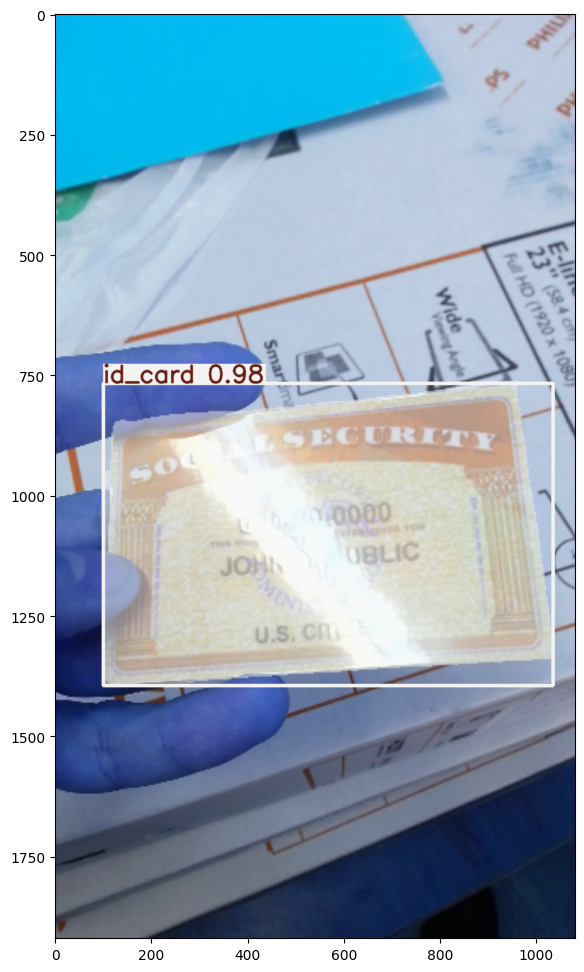

In [11]:
new_result_array = results[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(new_result_array)